In [1]:
import time
import pandas as pd
import re
# Imports
import csv
import pandas as pd
import numpy as np
from datetime import datetime
pd.options.display.max_colwidth = 100000

import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px


In [2]:
start = time.time()
# Read pickle file with topics and augmented text
df_notam = pd.read_pickle("data/allData_out_2.pkl")
# polygon = pd.read_csv('polygons.csv')
# spaceports = pd.read_csv('spaceports.csv')
# vertices = pd.read_csv('vertices.csv')
end = time.time()
print("Read NOTAM with pandas: ", (end-start),"sec")

print(df_notam.shape)

Read NOTAM with pandas:  3.4389476776123047 sec
(1649753, 38)


In [3]:
# print(notam.info())

# print(notam.head(5))
# Make POSSIBLE_START_DATE, POSSIBLE_END_DATE, ISSUE_DATE, and CANCELED_DATE datetime format
df_notam['POSSIBLE_START_DATE'] = pd.to_datetime(df_notam['POSSIBLE_START_DATE'], errors = 'coerce', format = '%Y/%m/%d %H:%M:%S')
df_notam['POSSIBLE_END_DATE'] = pd.to_datetime(df_notam['POSSIBLE_END_DATE'], errors = 'coerce', format = '%Y/%m/%d %H:%M:%S')
df_notam['ISSUE_DATE'] = pd.to_datetime(df_notam['ISSUE_DATE'], errors = 'coerce', format = '%Y/%m/%d %H:%M:%S')
df_notam['CANCELED_DATE'] = pd.to_datetime(df_notam['CANCELED_DATE'], errors = 'coerce', format = '%Y/%m/%d %H:%M:%S')

# Replace missing POSSIBLE_START_DATE with CANCELED_DATE and vise versa
df_notam.loc[df_notam['CANCELED_DATE'].isna(), 'CANCELED_DATE'] = df_notam.loc[df_notam['CANCELED_DATE'].isna(), 'POSSIBLE_END_DATE']
df_notam.loc[df_notam['POSSIBLE_END_DATE'].isna(), 'POSSIBLE_END_DATE'] = df_notam.loc[df_notam['POSSIBLE_END_DATE'].isna(), 'CANCELED_DATE']

# Drop NOTAMs without POSSIBLE_END_DATE and POSSIBLE_START_DATE
df_notam = df_notam.dropna( how='all', subset=['POSSIBLE_END_DATE', 'POSSIBLE_START_DATE'])

print(df_notam.shape)


(1649753, 38)


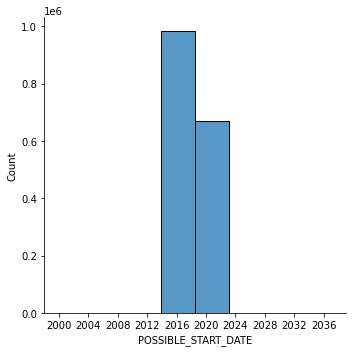

In [4]:
## NOTAM by year
sns.displot(df_notam['POSSIBLE_START_DATE'], bins=8)


In [5]:
print(df_notam['POSSIBLE_START_DATE'].min)

<bound method NDFrame._add_numeric_operations.<locals>.min of 0         2016-05-24 17:30:00
1         2016-05-24 17:30:00
2         2016-05-24 17:30:00
3         2016-05-24 17:30:00
4         2016-05-24 17:30:00
                  ...        
1649751   2020-06-01 11:00:00
1649752   2020-05-31 19:48:00
1649753   2020-06-01 15:00:00
1649754   2020-05-31 19:52:00
1649755   2020-05-31 20:00:00
Name: POSSIBLE_START_DATE, Length: 1649753, dtype: datetime64[ns]>


In [6]:
print(df_notam['POSSIBLE_END_DATE'].min)

<bound method NDFrame._add_numeric_operations.<locals>.min of 0         2016-05-24 19:45:00
1         2016-05-24 19:45:00
2         2016-05-24 19:45:00
3         2016-05-24 19:45:00
4         2016-05-24 19:45:00
                  ...        
1649751   2020-06-02 03:00:00
1649752   2020-06-03 19:48:00
1649753   2020-06-01 17:00:00
1649754   2020-06-01 01:00:00
1649755   2020-06-01 05:00:00
Name: POSSIBLE_END_DATE, Length: 1649753, dtype: datetime64[ns]>


In [7]:
print(df_notam['ISSUE_DATE'].min)

<bound method NDFrame._add_numeric_operations.<locals>.min of 0         2016-05-24 04:35:00
1         2016-05-24 04:35:00
2         2016-05-24 04:35:00
3         2016-05-24 04:35:00
4         2016-05-24 04:35:00
                  ...        
1649751   2020-05-31 12:47:00
1649752   2020-05-31 12:48:00
1649753   2020-05-31 12:51:00
1649754   2020-05-31 12:52:00
1649755   2020-05-31 12:50:00
Name: ISSUE_DATE, Length: 1649753, dtype: datetime64[ns]>


In [8]:
print(df_notam['CANCELED_DATE'].min)

<bound method NDFrame._add_numeric_operations.<locals>.min of 0         2016-05-24 12:10:00
1         2016-05-24 12:10:00
2         2016-05-24 12:10:00
3         2016-05-24 12:10:00
4         2016-05-24 12:10:00
                  ...        
1649751   2020-06-02 03:00:00
1649752   2020-06-03 19:48:00
1649753   2020-06-01 17:00:00
1649754   2020-06-01 01:00:00
1649755   2020-06-01 05:00:00
Name: CANCELED_DATE, Length: 1649753, dtype: datetime64[ns]>
